In [3]:

# Import packages
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

Preprocessing

In [7]:
df = pd.read_csv('Supermarket Data.csv')

In [8]:
df.head

<bound method NDFrame.head of         SHOP_WEEK  SHOP_DATE  ...  STORE_FORMAT  STORE_REGION
0          200732   20071005  ...            LS           E02
1          200733   20071010  ...            LS           E02
2          200741   20071209  ...            LS           E02
3          200731   20070929  ...            LS           E02
4          200737   20071110  ...            LS           E02
...           ...        ...  ...           ...           ...
956569     200617   20060622  ...            LS           W01
956570     200633   20061013  ...            LS           W01
956571     200617   20060622  ...            LS           W01
956572     200619   20060706  ...            LS           W01
956573     200635   20061023  ...            LS           W01

[956574 rows x 22 columns]>

In [9]:
print(df.shape)
print(df.columns)
print(df.info())

(956574, 22)
Index(['SHOP_WEEK', 'SHOP_DATE', 'SHOP_WEEKDAY', 'SHOP_HOUR', 'QUANTITY',
       'SPEND', 'PROD_CODE', 'PROD_CODE_10', 'PROD_CODE_20', 'PROD_CODE_30',
       'PROD_CODE_40', 'CUST_CODE', 'CUST_PRICE_SENSITIVITY', 'CUST_LIFESTAGE',
       'BASKET_ID', 'BASKET_SIZE', 'BASKET_PRICE_SENSITIVITY', 'BASKET_TYPE',
       'BASKET_DOMINANT_MISSION', 'STORE_CODE', 'STORE_FORMAT',
       'STORE_REGION'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 956574 non-null  int64  
 1   SHOP_DATE                 956574 non-null  int64  
 2   SHOP_WEEKDAY              956574 non-null  int64  
 3   SHOP_HOUR                 956574 non-null  int64  
 4   QUANTITY                  956574 non-null  int64  
 5   SPEND                     956574 non-null  float64
 6   PROD

In [10]:
df.describe()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,BASKET_ID
count,956574.000000,9.565740e+05,956574.000000,956574.000000,956574.000000,956574.000000,9.565740e+05
mean,200702.251671,2.006970e+07,3.996021,14.950665,1.514577,1.871697,9.941059e+14
std,65.857803,7.160957e+03,1.997058,3.636119,1.621021,2.767820,3.332150e+09
min,200607.000000,2.006041e+07,1.000000,8.000000,1.000000,0.010000,9.941001e+14
25%,200637.000000,2.006111e+07,2.000000,12.000000,1.000000,0.750000,9.941031e+14
50%,200713.000000,2.007052e+07,4.000000,15.000000,1.000000,1.200000,9.941059e+14
75%,200742.000000,2.007121e+07,6.000000,18.000000,1.000000,2.060000,9.941088e+14
max,200819.000000,2.008071e+07,7.000000,21.000000,129.000000,476.160000,9.941117e+14


In [11]:
df[['CUST_CODE','CUST_LIFESTAGE','STORE_REGION']]

,CUST_CODE,CUST_LIFESTAGE,STORE_REGION
0,CUST0000583261,YF,E02
1,CUST0000537317,OF,E02
2,CUST0000472158,YF,E02
3,CUST0000099658,OF,E02
4,NaN,NaN,E02
...,...,...,...
956569,NaN,NaN,W01
956570,NaN,NaN,W01
956571,CUST0000544241,YA,W01
956572,CUST0000423155,YF,W01


In [14]:
df2 = df[['CUST_CODE','SPEND','QUANTITY','BASKET_ID','SHOP_HOUR','SHOP_WEEKDAY','BASKET_SIZE']]

In [15]:
df2.head

<bound method NDFrame.head of              CUST_CODE  SPEND  QUANTITY  ...  SHOP_HOUR  SHOP_WEEKDAY  BASKET_SIZE
0       CUST0000583261   6.75         3  ...         17             6            L
1       CUST0000537317   6.75         3  ...         20             4            L
2       CUST0000472158   2.25         1  ...         11             1            L
3       CUST0000099658   2.25         1  ...         17             7            L
4                  NaN   6.75         3  ...         14             7            L
...                ...    ...       ...  ...        ...           ...          ...
956569             NaN   3.96         3  ...         12             5            M
956570             NaN   3.96         3  ...         20             6            L
956571  CUST0000544241   3.96         3  ...         18             5            L
956572  CUST0000423155   3.96         3  ...         19             5            L
956573             NaN   3.96         3  ...         21  

In [17]:
#Count null customer
print(df2['CUST_CODE'].isnull().sum())

153682


In [24]:
#count customer
df2['CUST_CODE'].count()

802892

Filter Member (There are Customer Code)

In [33]:
df_member = pd.read_csv('aggregate_data.csv')
print(df_member['CUST_CODE'].count())
print(df_member['CUST_CODE'].isnull().sum())

6100
0


In [48]:
df_member.describe()

,TOTAL_SPEND,TOTAL_VISIT,STD_TICKET_SIZE,DURING_SINCE_FIRST_PURCHASE,DURING_SINCE_LAST_PURCHASE,LENGHT_OF_STAY,AVERAGE_TIME_TO_EVENT,MODE_BASKET_SIZE,MODE_SHOP_TIME,MODE_WEEKDAY,AVERAGE_MONTHLY_VISIT,AVERAGE_MONTHLY_SPEND,STD_MONTHLY_SPEND,STD_MONTHLY_VISIT
count,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000
mean,246.038310,20.029180,1.473593,573.686230,243.070000,330.616230,46.170605,2.057049,2.167705,3.973443,9.646235,18.377850,8.656590,4.169706
std,704.599006,51.230247,1.850203,215.803423,247.437688,321.741491,68.231067,0.815306,0.698937,2.005228,14.236267,29.017284,14.976697,7.012247
min,0.010000,1.000000,0.000000,91.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000
25%,3.627500,1.000000,0.320000,396.000000,27.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.750000,2.220000,0.000000,0.000000
50%,19.145000,3.000000,1.136973,641.000000,139.000000,262.500000,15.476842,2.000000,2.000000,4.000000,4.000000,7.718929,1.184113,0.500000
75%,112.637500,11.000000,1.994921,768.000000,422.000000,670.000000,65.517857,3.000000,3.000000,6.000000,11.500000,22.087500,11.580436,5.656854
max,14998.110000,666.000000,32.007816,818.000000,818.000000,818.000000,402.500000,3.000000,3.000000,7.000000,129.750000,535.646786,156.524906,57.207216


In [35]:
df_member

,CUST_CODE,TOTAL_SPEND,TOTAL_VISIT,STD_TICKET_SIZE,DURING_SINCE_FIRST_PURCHASE,DURING_SINCE_LAST_PURCHASE,LENGHT_OF_STAY,AVERAGE_TIME_TO_EVENT,MODE_BASKET_SIZE,MODE_SHOP_TIME,MODE_WEEKDAY,AVERAGE_MONTHLY_VISIT,AVERAGE_MONTHLY_SPEND,STD_MONTHLY_SPEND,STD_MONTHLY_VISIT
0,CUST0000125708,910.55,117,2.333555,816,3,813,6.948718,3,3,2,19.148148,33.724074,19.074771,10.280163
1,CUST0000708150,142.83,34,1.638586,584,22,562,16.529412,2,3,5,11.000000,15.870000,10.913139,7.055337
2,CUST0000978405,2094.86,151,1.661519,816,3,813,5.384106,3,3,2,44.178571,74.816429,58.939975,36.620694
3,CUST0000109773,1355.11,55,2.250789,667,0,667,12.127273,3,3,6,36.263158,71.321579,47.305724,22.853866
4,CUST0000361582,531.93,33,0.898602,281,32,249,7.545455,3,3,2,44.700000,53.193000,28.903252,25.306323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,CUST0000040844,112.85,22,0.939787,815,9,806,36.636364,2,1,7,12.500000,14.106250,9.970681,9.205976
6096,CUST0000863414,268.10,22,1.937037,744,82,662,30.090909,3,3,4,9.125000,16.756250,16.587149,8.107674
6097,CUST0000866895,49.66,22,1.118008,400,33,367,16.681818,2,3,6,5.000000,6.207500,7.141428,5.338539
6098,CUST0000798581,232.68,22,3.357500,752,29,723,32.863636,2,2,7,6.153846,17.898462,17.462066,4.638404


In [36]:
df_member.columns

Index(['CUST_CODE', 'TOTAL_SPEND', 'TOTAL_VISIT', 'STD_TICKET_SIZE',
       'DURING_SINCE_FIRST_PURCHASE', 'DURING_SINCE_LAST_PURCHASE',
       'LENGHT_OF_STAY', 'AVERAGE_TIME_TO_EVENT', 'MODE_BASKET_SIZE',
       'MODE_SHOP_TIME', 'MODE_WEEKDAY', 'AVERAGE_MONTHLY_VISIT',
       'AVERAGE_MONTHLY_SPEND', 'STD_MONTHLY_SPEND', 'STD_MONTHLY_VISIT'],
      dtype='object')

In [113]:
# df_member_1 = df_member.groupby('CUST_CODE').agg({'BASKET_ID': ['nunique'],
#                                       'SPEND': ['sum']})
# df_member_1 = df_member[['TOTAL_VISIT','TOTAL_SPEND']]

# df_member_1 = df_member[['TOTAL_SPEND', 'TOTAL_VISIT', 'STD_TICKET_SIZE',
#        'DURING_SINCE_FIRST_PURCHASE', 'DURING_SINCE_LAST_PURCHASE',
#        'LENGHT_OF_STAY', 'AVERAGE_TIME_TO_EVENT', 'MODE_BASKET_SIZE',
#        'MODE_SHOP_TIME', 'MODE_WEEKDAY', 'AVERAGE_MONTHLY_VISIT',
#        'AVERAGE_MONTHLY_SPEND', 'STD_MONTHLY_SPEND', 'STD_MONTHLY_VISIT']]

# df_member_1 = df_member[['TOTAL_SPEND', 'TOTAL_VISIT', 
#        'DURING_SINCE_FIRST_PURCHASE', 'DURING_SINCE_LAST_PURCHASE',
#        'LENGHT_OF_STAY', 'AVERAGE_TIME_TO_EVENT', 'AVERAGE_MONTHLY_VISIT',
#        'AVERAGE_MONTHLY_SPEND',]]

df_member_1 = df_member[[ 'TOTAL_VISIT', 'STD_TICKET_SIZE',
       'DURING_SINCE_FIRST_PURCHASE', 'DURING_SINCE_LAST_PURCHASE',
       'LENGHT_OF_STAY', 'AVERAGE_TIME_TO_EVENT', 'MODE_BASKET_SIZE',
       'MODE_SHOP_TIME', 'MODE_WEEKDAY', 'AVERAGE_MONTHLY_VISIT',
       'AVERAGE_MONTHLY_SPEND', 'STD_MONTHLY_SPEND', 'STD_MONTHLY_VISIT']]

In [114]:
df_member_1.head(10)

,TOTAL_VISIT,STD_TICKET_SIZE,DURING_SINCE_FIRST_PURCHASE,DURING_SINCE_LAST_PURCHASE,LENGHT_OF_STAY,AVERAGE_TIME_TO_EVENT,MODE_BASKET_SIZE,MODE_SHOP_TIME,MODE_WEEKDAY,AVERAGE_MONTHLY_VISIT,AVERAGE_MONTHLY_SPEND,STD_MONTHLY_SPEND,STD_MONTHLY_VISIT
0,117,2.333555,816,3,813,6.948718,3,3,2,19.148148,33.724074,19.074771,10.280163
1,34,1.638586,584,22,562,16.529412,2,3,5,11.000000,15.870000,10.913139,7.055337
2,151,1.661519,816,3,813,5.384106,3,3,2,44.178571,74.816429,58.939975,36.620694
3,55,2.250789,667,0,667,12.127273,3,3,6,36.263158,71.321579,47.305724,22.853866
4,33,0.898602,281,32,249,7.545455,3,3,2,44.700000,53.193000,28.903252,25.306323
5,308,3.410482,818,1,817,2.652597,3,2,5,73.357143,114.276786,43.462072,17.433986
6,26,2.746535,808,25,783,30.115385,2,2,4,5.222222,16.271111,7.130855,2.484520
7,292,1.283374,814,2,812,2.780822,3,2,2,113.035714,163.771429,42.786863,28.563816
8,69,2.287239,804,2,802,11.623188,2,2,5,10.909091,20.541818,15.322938,8.474073
9,103,2.327013,806,16,790,7.669903,3,3,6,44.370370,92.364074,50.744659,22.296235


In [115]:
print(df_member_1.columns)

Index(['TOTAL_VISIT', 'STD_TICKET_SIZE', 'DURING_SINCE_FIRST_PURCHASE',
       'DURING_SINCE_LAST_PURCHASE', 'LENGHT_OF_STAY', 'AVERAGE_TIME_TO_EVENT',
       'MODE_BASKET_SIZE', 'MODE_SHOP_TIME', 'MODE_WEEKDAY',
       'AVERAGE_MONTHLY_VISIT', 'AVERAGE_MONTHLY_SPEND', 'STD_MONTHLY_SPEND',
       'STD_MONTHLY_VISIT'],
      dtype='object')


In [116]:
len_columns = len(list(df_member_1.columns))
print(range(0,len_columns))
list(range(0,len_columns))

range(0, 13)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [117]:
def drawSSEPlot(df, column_indices, n_clusters=8, max_iter=300, tol=1e-04, init='k-means++', n_init=10, algorithm='auto'):
    import matplotlib.pyplot as plt
    inertia_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, n_init=n_init, random_state=1, algorithm=algorithm)
        km.fit_predict(df.iloc[:, column_indices])
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, n_clusters+1), inertia_values, color='red')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('SSE / Inertia', fontsize=15)
    plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()

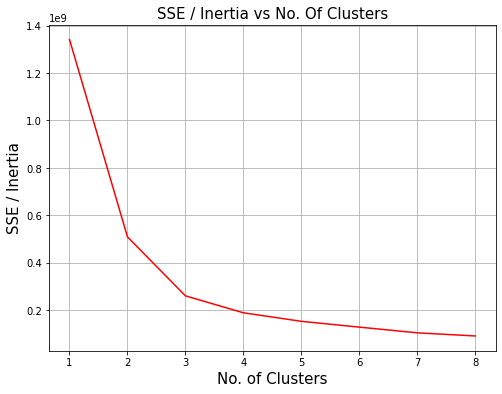

In [118]:
drawSSEPlot(df_member_1, list(range(0,len_columns)))

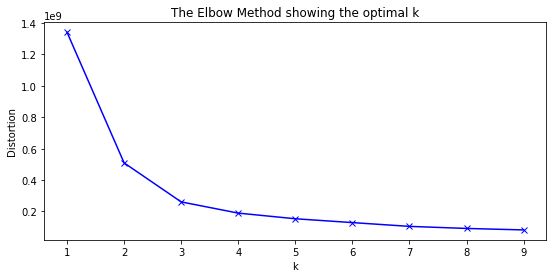

In [119]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_member_1[df_member_1.columns])
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(9,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [120]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    # kmeanModel.fit(df_member_1[df_member_1.columns])
    y_predict = kmeanModel.fit_predict(df_member_1)
    centroids  = kmeanModel.cluster_centers_
    # distortions.append(kmeanModel.inertia_)
    # get silhouette
    silhouette_vals = silhouette_samples(df_member_1,y_predict)
    print('cluster:',k,'Average Silhouette:', sum(silhouette_vals)/len(silhouette_vals))
    


cluster: 2 Average Silhouette: 0.5528259646310404
cluster: 3 Average Silhouette: 0.5687327378326259
cluster: 4 Average Silhouette: 0.5043314988334825
cluster: 5 Average Silhouette: 0.4561886780512149
cluster: 6 Average Silhouette: 0.4378029422945213
cluster: 7 Average Silhouette: 0.44241039376641095
cluster: 8 Average Silhouette: 0.4247597661607978
cluster: 9 Average Silhouette: 0.40694483939984805


Silhouette use K=3

In [14]:
df_k3 = pd.read_csv('result_no_total_spend.csv')

In [15]:
df_k3.head(5)

,CENTROID_ID,CUST_CODE,TOTAL_SPEND,TOTAL_VISIT,STD_TICKET_SIZE,DURING_SINCE_FIRST_PURCHASE,DURING_SINCE_LAST_PURCHASE,LENGHT_OF_STAY,AVERAGE_TIME_TO_EVENT,MODE_BASKET_SIZE,MODE_SHOP_TIME,MODE_WEEKDAY,AVERAGE_MONTHLY_VISIT,AVERAGE_MONTHLY_SPEND,STD_MONTHLY_SPEND,STD_MONTHLY_VISIT
0,2,CUST0000161376,3146.67,127,2.632437,816,10,806,6.346457,3,2,1,57.407407,116.543333,58.523039,25.575247
1,2,CUST0000037123,2564.38,210,1.415367,817,3,814,3.876190,3,1,2,68.357143,91.585000,41.263924,28.866954
2,1,CUST0000708150,142.83,34,1.638586,584,22,562,16.529412,2,3,5,11.000000,15.870000,10.913139,7.055337
3,1,CUST0000635118,1038.09,136,2.551961,812,3,809,5.948529,3,3,3,20.142857,37.074643,30.421303,12.472009
4,1,CUST0000203439,535.54,151,1.237576,813,2,811,5.370861,2,1,1,12.464286,19.126429,10.488947,6.472371


In [16]:
df_k3.columns

Index(['CENTROID_ID', 'CUST_CODE', 'TOTAL_SPEND', 'TOTAL_VISIT',
       'STD_TICKET_SIZE', 'DURING_SINCE_FIRST_PURCHASE',
       'DURING_SINCE_LAST_PURCHASE', 'LENGHT_OF_STAY', 'AVERAGE_TIME_TO_EVENT',
       'MODE_BASKET_SIZE', 'MODE_SHOP_TIME', 'MODE_WEEKDAY',
       'AVERAGE_MONTHLY_VISIT', 'AVERAGE_MONTHLY_SPEND', 'STD_MONTHLY_SPEND',
       'STD_MONTHLY_VISIT'],
      dtype='object')

In [17]:
X = df_k3[[  'TOTAL_VISIT',
       'STD_TICKET_SIZE', 'DURING_SINCE_FIRST_PURCHASE',
       'DURING_SINCE_LAST_PURCHASE', 'LENGHT_OF_STAY', 'AVERAGE_TIME_TO_EVENT',
       'MODE_BASKET_SIZE', 'MODE_SHOP_TIME', 'MODE_WEEKDAY',
       'AVERAGE_MONTHLY_VISIT', 'AVERAGE_MONTHLY_SPEND', 'STD_MONTHLY_SPEND',
       'STD_MONTHLY_VISIT']]
y = df_k3['CENTROID_ID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [18]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_feature_importance = rf.feature_importances_

In [19]:
rf_feature_importance

array([0.00347106, 0.01823296, 0.0077548 , 0.00650017, 0.66461497,
       0.01974711, 0.02289343, 0.00234628, 0.00214009, 0.04776392,
       0.08897452, 0.10655553, 0.00900515])

In [20]:
X.columns

Index(['TOTAL_VISIT', 'STD_TICKET_SIZE', 'DURING_SINCE_FIRST_PURCHASE',
       'DURING_SINCE_LAST_PURCHASE', 'LENGHT_OF_STAY', 'AVERAGE_TIME_TO_EVENT',
       'MODE_BASKET_SIZE', 'MODE_SHOP_TIME', 'MODE_WEEKDAY',
       'AVERAGE_MONTHLY_VISIT', 'AVERAGE_MONTHLY_SPEND', 'STD_MONTHLY_SPEND',
       'STD_MONTHLY_VISIT'],
      dtype='object')

In [49]:
temp = list()
for i in reversed(X.columns[sorted_idx]):
  temp.append(i)


In [50]:
temp

['LENGHT_OF_STAY',
 'STD_MONTHLY_SPEND',
 'AVERAGE_MONTHLY_SPEND',
 'AVERAGE_MONTHLY_VISIT',
 'MODE_BASKET_SIZE',
 'AVERAGE_TIME_TO_EVENT',
 'STD_TICKET_SIZE',
 'STD_MONTHLY_VISIT',
 'DURING_SINCE_FIRST_PURCHASE',
 'DURING_SINCE_LAST_PURCHASE',
 'TOTAL_VISIT',
 'MODE_SHOP_TIME',
 'MODE_WEEKDAY']

Text(0.5, 0, 'Random Forest Feature Importance')

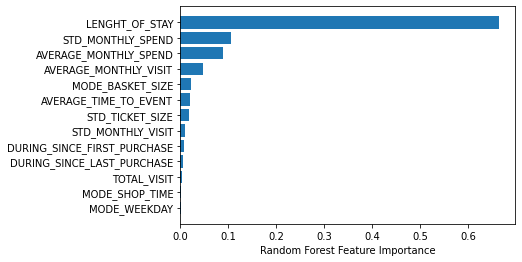

In [51]:
# plt.barh(X.columns, rf.feature_importances_)

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#EDA

In [60]:
def density_plot(c,v):
  # Converting to wide dataframe
  data_wide = df_k3.pivot(columns = c,
                      values = v)
    
  # plotting multiple density plot
  data_wide.plot.kde(figsize = (8, 6))
  print(v)

LENGHT_OF_STAY
STD_MONTHLY_SPEND
AVERAGE_MONTHLY_SPEND
AVERAGE_MONTHLY_VISIT
MODE_BASKET_SIZE


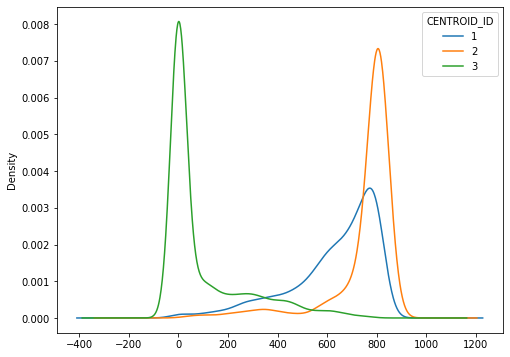

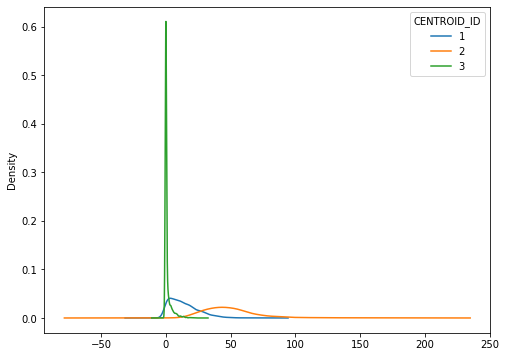

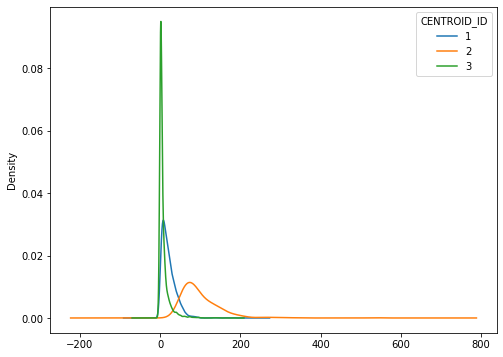

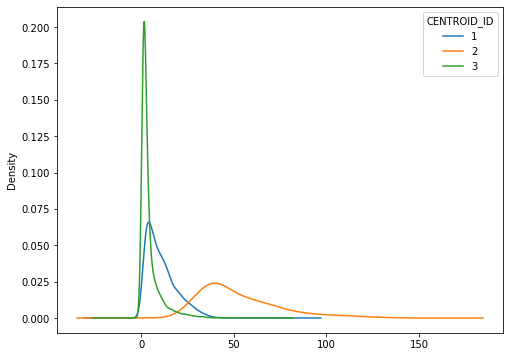

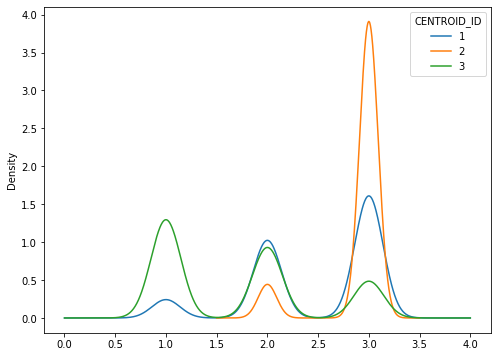

In [61]:
for colum in temp[:5]:
  density_plot('CENTROID_ID',colum)
  # print(colum)

#Reference
##SSE
https://vitalflux.com/k-means-elbow-point-method-sse-inertia-plot-python/

##Silhouette Analysis in K-means Clustering
https://medium.com/@cmukesh8688/silhouette-analysis-in-k-means-clustering-cefa9a7ad111

##Importance Feature with Random Forest
https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=Random%20Forest%20Built%2Din%20Feature,from%20the%20Random%20Forest%20structure.&text=The%20average%20over%20all%20trees,measure%20of%20the%20feature%20importance.